In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from ReliefF import ReliefF

In [2]:
root = "../../../"

In [3]:
df = pd.read_csv(root + "datasets/multiclass/processed/CICDDoS_corr.csv", index_col=[0])

In [4]:
X = df.drop(columns=[' Label'])
y = df[' Label']

In [5]:
relief = ReliefF(n_neighbors=20, n_features_to_keep=20)
relief.fit(X.to_numpy(),y.to_numpy())
relief.feature_scores

array([19336., 20698., 15878., 23860., 21836., 16072., 16944., 15830.,
        5506.,  4218.,  -374., 23962.,  8600.,  8064., 14332., 21170.,
       14352., 15462., 17822.,  4220., 11426., 28866., 16070., 24714.,
       24202., 22702., 21924., 15830., 19336., 20698., 15878., 21476.,
       18496., 11196., 20628., 20894., 19462., 19192.])

Text(0, 0.5, 'Weights')

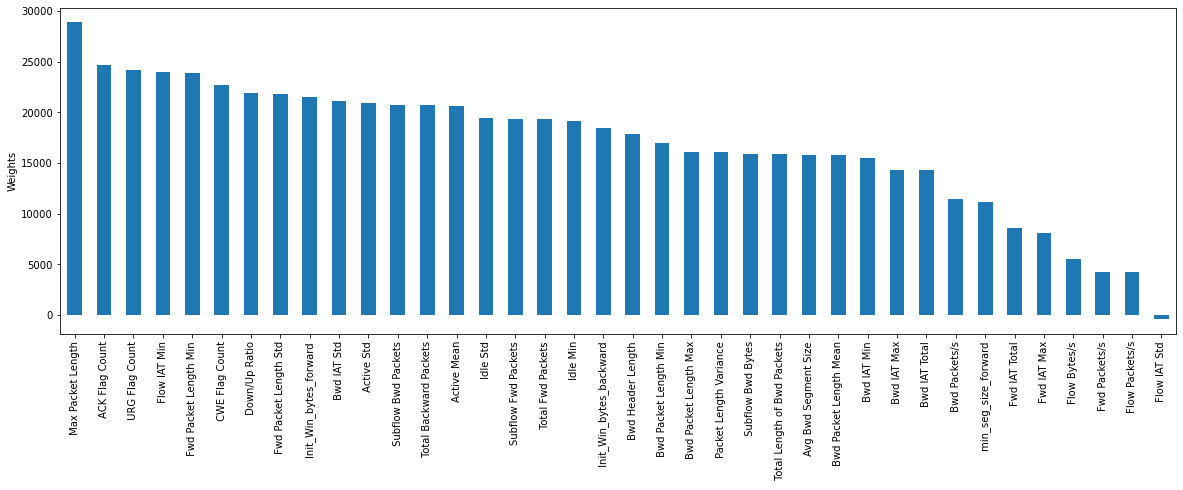

In [6]:
# 1) let's capture the above array in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a bar plot

weights = pd.Series(relief.feature_scores)
weights.index = X.columns
weights.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Weights')

In [7]:
# display features
X.columns[relief.top_features[:20]]

Index([' Max Packet Length', ' ACK Flag Count', ' URG Flag Count',
       ' Flow IAT Min', ' Fwd Packet Length Min', ' CWE Flag Count',
       ' Down/Up Ratio', ' Fwd Packet Length Std', 'Init_Win_bytes_forward',
       ' Bwd IAT Std', ' Active Std', ' Subflow Bwd Packets',
       ' Total Backward Packets', 'Active Mean', ' Idle Std',
       'Subflow Fwd Packets', ' Total Fwd Packets', ' Idle Min',
       ' Init_Win_bytes_backward', ' Bwd Header Length'],
      dtype='object')

In [8]:
# to remove the rest of the features:

X = relief.transform(X.to_numpy())

In [9]:
X.shape

(5280, 20)